### (1) Implementation of Fast Marching Method and Shortest path definition for all sections

In [1]:
import numpy as np
import skfmm as fmm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Shortest Path Functions

def element_neighbour(index, array, inet): #return an array 1x5 with the values of the neighbours of a particular element
    # parameters: 'index' --> array 1x2 with indexes of point of interes [row, col]. 
    # parameters: 'array' --> array with values of interest  
    # parameters: 'inet' --> array of current intrusion network. If one of the elements is already inet=0, the assign -1.
    
    rows = len(array)-1 # max index of rows of time_map array 
    cols = len(array[0])-1 # max index of columns of time_map arrays
    values = np.zeros(8) # array to save the values (element above, element to the left, element to the right)
    
    if (index[0] > 0) and (index[0] < rows):
        if (index[1] > 0) and (index [1] < cols):
            values[0] = array[index[0]-1, index[1]-1]
            values[1] = array[index[0]-1, index[1]]
            values[2] = array[index[0]-1, index[1]+1]
            values[3] = array[index[0], index[1]-1]
            values[4] = array[index[0], index[1]+1]
            values[5] = array[index[0]+1, index[1]-1]
            values[6] = array[index[0]+1, index[1]]
            values[7] = array[index[0]+1, index[1]+1]
    else:
        if index[0] == 0:
            if index[1] == 0:
                values[0] = -1
                values[1] = -1
                values[2] = -1
                values[3] = -1
                values[4] = array[index[0], index[1]+1]
                values[5] = -1
                values[6] = array[index[0]+1, index[1]]
                values[7] = array[index[0]+1, index[1]+1]
                
            elif index[1] == cols:
                values[0] = -1
                values[1] = -1
                values[2] = -1
                values[3] = array[index[0], index[1]-1]
                values[4] = -1
                values[5] = array[index[0]+1, index[1]-1]
                values[6] = array[index[0]+1, index[1]]
                values[7] = -1
            else:
                values[0] = -1
                values[1] = -1
                values[2] = -1
                values[3] = array[index[0], index[1]-1]
                values[4] = array[index[0], index[1]+1]
                values[5] = array[index[0]+1, index[1]-1]
                values[6] = array[index[0]+1, index[1]]
                values[7] = array[index[0]+1, index[1]+1]
                
        else:
            if index[1] == 0:
                values[0] = -1
                values[1] = array[index[0]-1, index[1]]
                values[2] = array[index[0]-1, index[1]+1]
                values[3] = -1
                values[4] = array[index[0], index[1]+1]
                values[5] = -1
                values[6] = -1
                values[7] = -1
            elif index[1] == cols:
                values[0] = array[index[0]-1, index[1]-1]
                values[1] = array[index[0]-1, index[1]]
                values[2] = -1
                values[3] = array[index[0], index[1]-1]
                values[4] = -1
                values[5] = -1
                values[6] = -1
                values[7] = -1
            else:
                values[0] = array[index[0]-1, index[1]-1]
                values[1] = array[index[0]-1, index[1]]
                values[2] = array[index[0]-1, index[1]+1]
                values[3] = array[index[0], index[1]-1]
                values[4] = array[index[0], index[1]+1]
                values[5] = -1
                values[6] = -1
                values[7] = -1
                
    #check if some of the neighbours is already part of the intrusion network
    for h in range(8):
        if values[h] > -1:
            if h == 0:          
                if inet[index[0]-1, index[1]-1] == 0:
                    values[0] = -1
            if h == 1:  
                if inet[index[0]-1, index[1]] == 0:
                    values[1] = -1
            if h == 2:  
                if inet[index[0]-1, index[1]+1] == 0:
                    values[2] = -1
            if h == 3:  
                if inet[index[0], index[1]-1] == 0:
                    values[3] = -1
            if h == 4:  
                if inet[index[0], index[1]+1] == 0:
                    values[4] = -1
            if h == 5:  
                if inet[index[0]+1, index[1]-1] == 0:
                    values[5] = -1
            if h == 6:  
                if inet[index[0]+1, index[1]] == 0:
                    values[6] = -1
            if h == 7:  
                if inet[index[0]+1, index[1]+1] == 0:
                    values[7] = -1
        else:
            continue

        
    return values

def index_min(array): #return the index value of the minimum value in an array of 1x8
    index_array = {}
    
    for i in range(8): #create a dictionary assining positions from 0 to 7 to the values in the array
        a=i
        if array[i]>=0:
            index_array.update({i:array[i]})
    
    minimum_val = min(index_array.values())
    
    for key, value in index_array.items():
        if value == minimum_val:
            index_min = key 

    return index_min

def new_inlet(inlet,direction): 
    #outlet is an array of the outlet position
    #direction in a number--> 0: above-left, 1: above, 2: above right, 3: left, 4: right, 5: below left, 6: below, 7:below right
    pot_new_inlets = {}
    
    pot_new_inlets.update({"0": np.array([inlet[0]-1, inlet[1]-1])})
    pot_new_inlets.update({"1": np.array([inlet[0]-1, inlet[1]])})
    pot_new_inlets.update({"2": np.array([inlet[0]-1, inlet[1]+1])})
    pot_new_inlets.update({"3": np.array([inlet[0], inlet[1]-1])})
    pot_new_inlets.update({"4": np.array([inlet[0], inlet[1]+1])})
    pot_new_inlets.update({"5": np.array([inlet[0]+1, inlet[1]-1])})
    pot_new_inlets.update({"6": np.array([inlet[0]+1, inlet[1]])})
    pot_new_inlets.update({"7": np.array([inlet[0]+1, inlet[1]+1])})
    new_outlet = np.zeros(2)
    
    for key, value in pot_new_inlets.items():
        if key == str(direction):
            new_inlet = value
    return new_inlet
            
def shortest_path(inlet, outlet, time_map):
    # Look for the shortest path between inlet and outlet. returns a matrix with 0's showing the intrusion network (shortest path). 
    # parameters: 'inlet' and 'oulet' --> array of indexes of inlet and outlet of the system
    # parameters: 'time_map' --> array with time map   
    
    inet= np.ones_like(time_map) #array to save shortest path with zeros
    temp_inlet = inlet
    inet[temp_inlet[0],temp_inlet[1]] = 0
    i=0
    
    while True:
        i=i+1
        time_temp_inlet = time_map[temp_inlet[0], temp_inlet[1]] # obtain time value of temporary outlet
        neighbors = element_neighbour(temp_inlet, time_map, inet) # identify neighbours elements of temporary outlet
        direction = index_min(neighbors) #obtain the location (index min) of minimun difference
        temp_inlet = new_inlet(temp_inlet, direction)
        a = temp_inlet[0]
        b = temp_inlet[1]
        inet[a,b] = 0
        
        if temp_inlet[0]==outlet[0] and temp_inlet[1]==outlet[1]:
            break
        else:
            continue
                 

    return inet

def velocity_field(distance_field):
    #for an array containing the distance field of a section, Create array with values and velocity as v = 1/d^2
    velocity = np.zeros(distance_field.shape)
    rows = len(distance_field) 
    cols = len(distance_field[0])
    
    for i in range(cols):
        for j in range(rows):
            if distance_field[j,i] != 0:
                velocity[j,i] = 1/(distance_field[j,i]**2)
            else:
                velocity[j,i] = 50
    return velocity

def inlet(distance_field):
    inlet_value = np.min(np.abs(distance_field[:,0]))
    rows = len(distance_field)
    for i in range(rows):
        if np.abs(distance_field[i,0]) == inlet_value:
            inlet_index_section1 = i
            
    inlet = np.array([inlet_index_section1,0])
    return inlet
    
def outlet(distance_field):
    cols = len(distance_field[0])
    rows = len(distance_field)
    outlet_value = np.min(np.abs(distance_field[:,cols-1]))
    for i in range(rows):
        if np.abs(distance_field[i,cols-1]) == outlet_value:
            outlet_index_section1 = i
    
    outlet = np.array([outlet_index_section1,cols-1])
    return outlet

In [3]:
#grid - array

def grid_from_array(array, fixed_coord, lower_extent, upper_extent): 
    # to a specific array, this function assigns coordinates for each array element of index [i,j].
    # returns a matrix of [i,j,x,y,z,values in array]
    # fixed_coord --> array of 1x2 with coordinate fixed and value, 
    # ie, [0,2] means section is in x=2, or [1, .45] means sections is in y= 0.45
    
    spacing_i = len(array) # number of rows
    spacing_j = len(array[0]) #number of columns
    values = np.zeros([spacing_i*spacing_j,6])
    if fixed_coord[0] == 0:
        y = np.linspace(lower_extent[1],upper_extent[1],spacing_j)
        z = np.linspace(lower_extent[2],upper_extent[2],spacing_i)
        l = 0
        for j in range(spacing_j):
            for i in range(spacing_i):
                values[l] = [i, j, fixed_coord[1], y[j], z[i], array[spacing_i-1-i,j]]
                l=l+1
                
    if fixed_coord[0] == 1:
        x = np.linspace(lower_extent[0],upper_extent[0],spacing_j)
        z = np.linspace(lower_extent[2],upper_extent[2],spacing_i)
        l = 0
        for j in range(spacing_j):
            for i in range(spacing_i):
                values[l] = [i, j, x[j], fixed_coord[1], z[i], array[spacing_i-1-i,j]]
                l=l+1
                
    if fixed_coord[0] == 2:
        x = np.linspace(lower_extent[0],upper_extent[0],spacing_j)
        y = np.linspace(lower_extent[1],upper_extent[1],spacing_i)
        l = 0
        for j in range(spacing_j):
            for i in range(spacing_i):
                values[l] = [spacing_i-1-i, spacing_j-1-j, x[j], y[i], fixed_coord[1], array[spacing_i-1-i,j]]
                l=l+1
                
    return values

def array_from_coords(df):
    #for a given dataframe with coordinates and value, create an array of the value data
    df.sort_values(['X','Z'], ascending = [True, False], inplace = True)
    xs = df['X'].unique()
    zs = df['Z'].unique()
    rows = len(zs)
    columns = len(xs)
    array = np.zeros([rows,columns])
    n= 0
    for j in range(columns):
        for i in range(rows):
            array[i,j] = df.iloc[i+n,4]
        n = n+rows
    return array

1. Create arrays with distances values for each section

In [4]:
# Read csv with section distance values and create a list with arrays containing the distances values
# Create array with values and velocity as v = 1/d^2

# Minimun x,y,z and maximum x,y,z of each sections. 
# This is then used to obtain the upper and lower extent of each section

distances_arrays = [] #list having arrays with distance values of each section
minx_arr = [] 
maxx_arr = []
minz_arr = []
maxz_arr = []
ys = []

for k in range(50):
    section_df = pd.read_csv('c:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_Distance_Sections/Section_{}.csv'.format(k))
    minx_arr.append(section_df['X'].min())
    maxx_arr.append(section_df['X'].max())
    minz_arr.append(section_df['Z'].min())
    maxz_arr.append(section_df['Z'].max())
    ys.append(section_df['Y'].min())
    distance = array_from_coords(section_df)
    distances_arrays.append(distance)

In [5]:
minx = min(minx_arr) 
maxx = max(maxx_arr)
minz = min(minz_arr)
maxz = max(maxz_arr)

<Figure size 432x288 with 0 Axes>

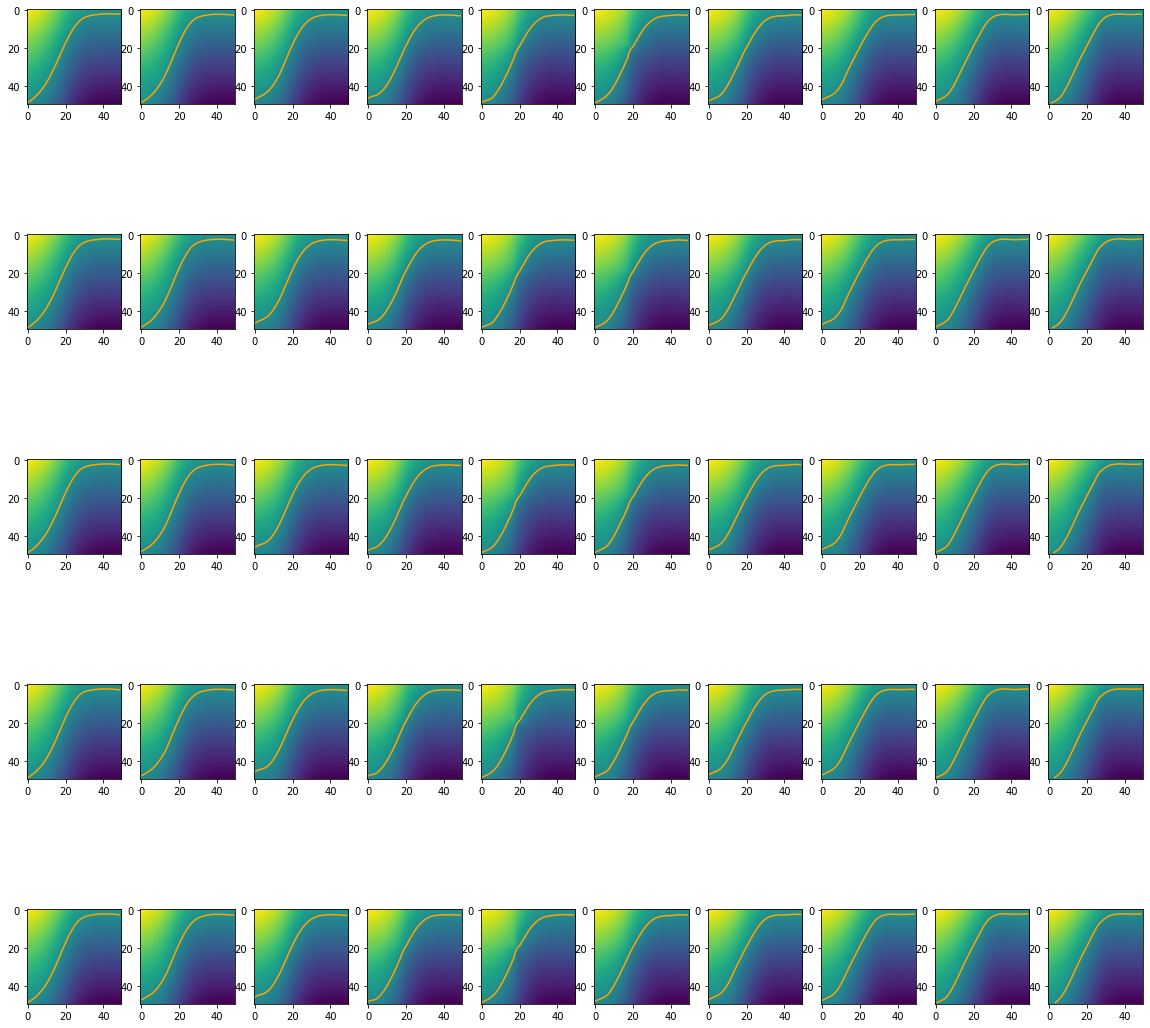

In [16]:
## Visualization of sections

fig = plt.figure()
fig, ax = plt.subplots(5,10, figsize = (20,20),)
d = 0
for g in range(10):
    for h in range(5):
        distance_temp = distances_arrays[d]
        d = d+1
        ax[h,g].imshow(distance_temp)
        ax[h,g].contour(distance_temp,levels=[0],colors=['orange'])

2. Create array with velocity parameters for each section

In [7]:
# Compute and visualization of the velocity parameters

velocity_arrays = [] #list having arrays with velocity values of each section
for u in range(len(distances_arrays)):
    velocity = velocity_field(distances_arrays[u])
    velocity_arrays.append(velocity)

In [8]:
# Identification of inlet and outlet of each section
# and creation of array with initial point for time map

initial_point_array = [] #list having arrays with the initial points (outlet) to compute the time map of each section
inlet_array = []
outlet_array = []
for k in range(len(distances_arrays)):
    inlet_ = inlet(distances_arrays[k])
    inlet_array.append(inlet_)
    outlet_ = outlet(distances_arrays[k])
    outlet_array.append(outlet_)
    array = np.ones([50,50])
    array[outlet_[0],outlet_[1]] = 0
    initial_point_array.append(array)
 

3. Compute the time map for each section. The arrival time is calculated starting from the outlet, and given the velocity field defined above

In [10]:
# Compute of time map, starting from the outlet, and given the velocity field defined above.

time_map_array = [] #list having arrays with time map of each section
for o in range(len(distances_arrays)):
    time_map_section = fmm.travel_time(initial_point_array[o], velocity_arrays[o], order = 2)
    time_map_array.append(time_map_section)

<Figure size 432x288 with 0 Axes>

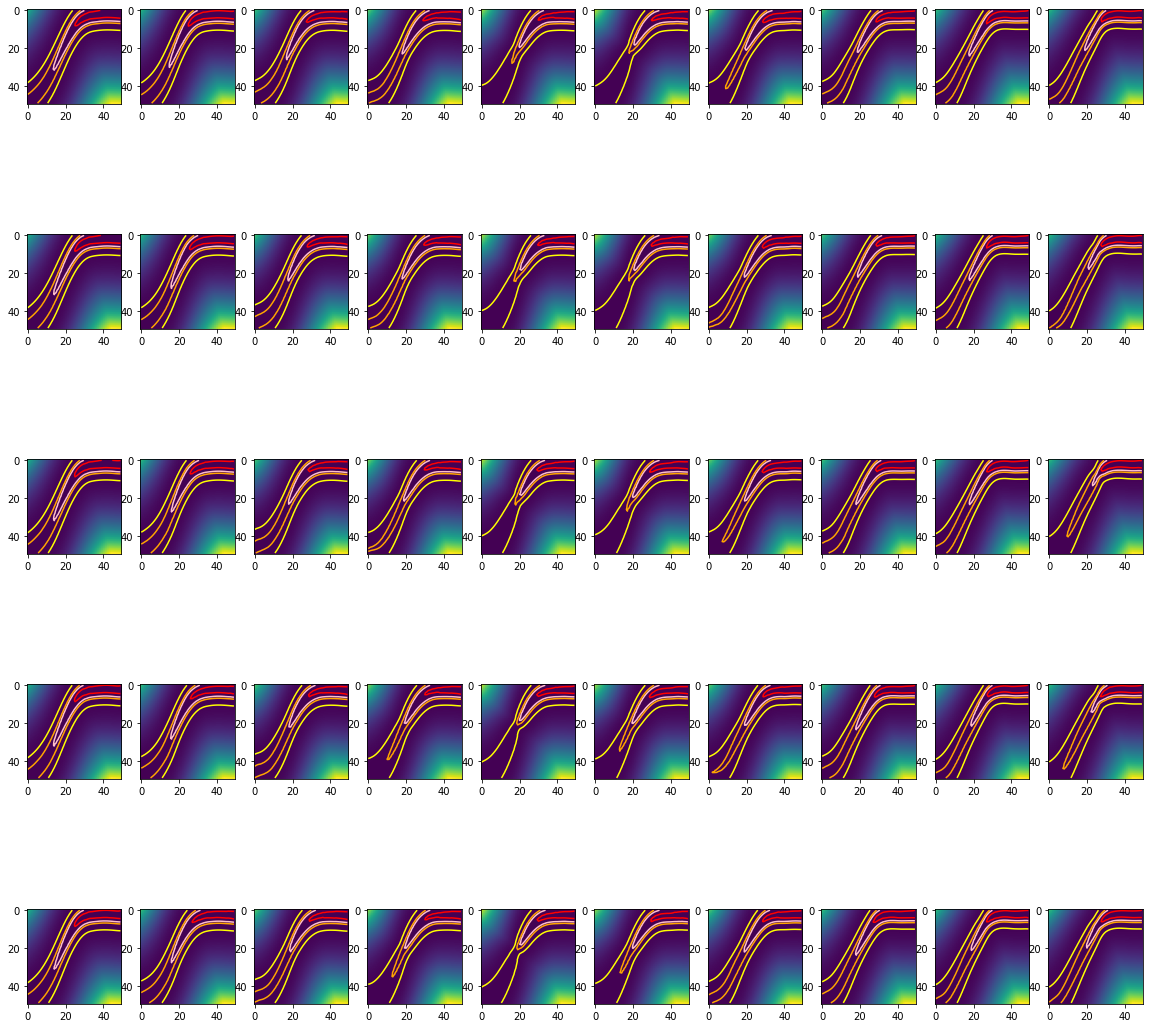

In [11]:
# Visualization of time maps

fig = plt.figure()
fig, ax = plt.subplots(5,10, figsize = (20,20))
d = 0
for g in range(10):
    for h in range(5):
        time_map_temp = time_map_array[d]
        d = d+1
        ax[h,g].imshow(time_map_temp)
        ax[h,g].contour(time_map_temp,levels=[0.1,0.5,1,5],colors=['red','pink','orange','yellow'])

In [13]:
# inet_grid = inet_coords[0]
# for t in range(len(inet_coords)-1):
#     np.append(inet_grid, inet_coords[t+1], axis=1)

# print(inet_grid)

4. Find de shortest path between the inlet and the outlet

In [14]:
# Find shortest path, starting from the inlet
# Compute the coordinates for the intrusion network and save the points

inet_array = [] #list having arrays with shortest path (0 value shows shortest path)
inet_coords = [] #list having arrays with coordinates of intrusion network
for s in range(len(time_map_array)):
    intrusion_network_section = shortest_path(inlet_array[s], outlet_array[s], time_map_array[s])
    inet_array.append(intrusion_network_section)
    intrusion_network_coords_section = grid_from_array(intrusion_network_section, [1,ys[s]] , [minx, 0, minz], [maxx, 10, maxz])
    inet_coords.append(intrusion_network_coords_section)
len(inet_array)

50

<Figure size 432x288 with 0 Axes>

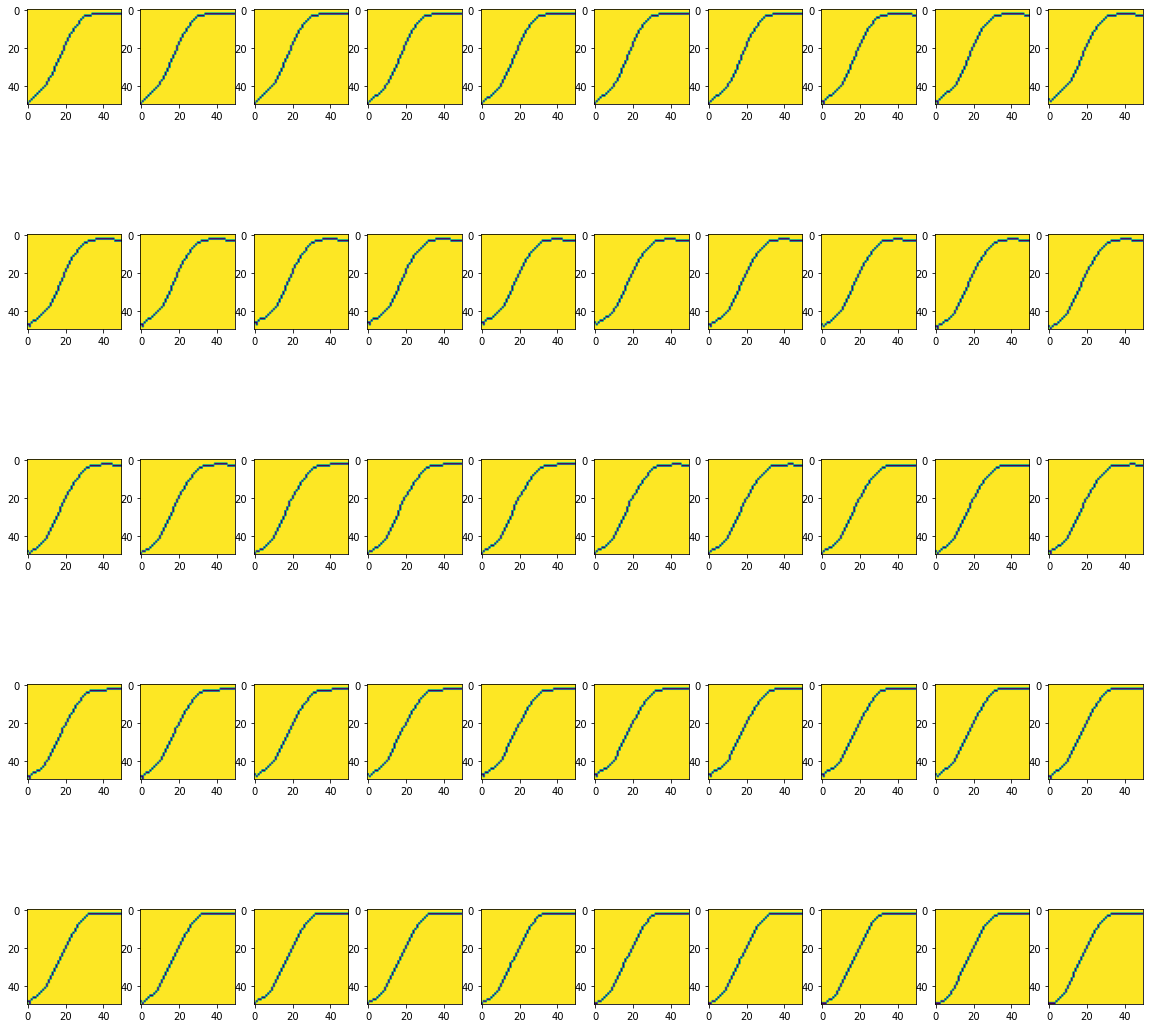

In [15]:
fig = plt.figure()
fig, ax = plt.subplots(5,10, figsize = (20,20))
d = 0
for g in range(5):
    for h in range(10):
        shortestpath_temp = inet_array[d]
        ax[g,h].imshow(shortestpath_temp)
        d = d+1

5. Group all the sections to plot them in 3D

In [17]:
# Create array of all coordinates of the intrusion network
inet_coords_temp = inet_coords[0]
for gf in range(len(inet_coords)-1):
    inet_coords_temp = np.vstack([inet_coords_temp, inet_coords[gf+1]])

len(inet_coords_temp)

125000

In [18]:
counta = 0
for hg in range(len(inet_coords_temp)):
    if inet_coords_temp[hg,5] == 0:
        counta = counta+1

inet_coordinates = np.zeros([counta, 4])
kl = 0
for df in range(len(inet_coords_temp)):
    if inet_coords_temp[df,5] == 0:
        inet_coordinates[kl,0] = inet_coords_temp[df,2]
        inet_coordinates[kl,1] = inet_coords_temp[df,3]
        inet_coordinates[kl,2] = inet_coords_temp[df,4]
        inet_coordinates[kl,3] = inet_coords_temp[df,5]
        kl=kl+1
counta

3317

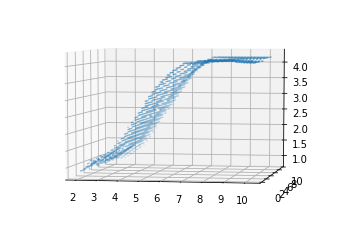

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(inet_coordinates[:,0],inet_coordinates[:,1],inet_coordinates[:,2], s=0.05)
ax.view_init(5, -80)

Step 2

In [24]:
#TEST STEP 2

roof_observations = pd.read_csv('c:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_2RoofObservations.csv')

In [25]:
def velocity_step2(distance_array,obs_point_df):
    mean = obs_point_df.mean(axis = 0)
    std_dev = obs_point_df.std(axis = 0)
    obs_val_mean = mean[4]
    obs_val_std = std_dev[4]
    
    velocity_step2 = np.zeros(distance_array.shape)
    rows = len(distance_array)
    cols = len(distance_array[0])
    
    for k in range(rows):
        for l in range(cols):
            if distance_array[k,l] <= obs_val_mean + obs_val_std and distance_array[k,l]>0:
                velocity_step2[k,l] = 1
            else:
                velocity_step2[k,l] = 0.1
           
       
    return velocity_step2


In [26]:
# Compute of velocity parameters for each section, given a ser of roof points
velocity_array_step2 = []
for tg in range(len(distances_arrays)):
    vel = velocity_step2(distances_arrays[tg], roof_observations)
    velocity_array_step2.append(vel)

In [27]:
#compute the time map for each section
time_map_arrays_step2 = []
time_map_coords_step2 = []
for iu in range(len(inet_array)):
    timemap_section_step2 = fmm.travel_time(inet_array[iu],velocity_array_step2[iu], order = 1)
    time_map_arrays_step2.append(timemap_section_step2)
    timemap_coords_step2 = grid_from_array(timemap_section_step2, [1,ys[iu]] , [minx, 0, minz], [maxx, 10, maxz])
    time_map_coords_step2.append(timemap_coords_step2)

<Figure size 432x288 with 0 Axes>

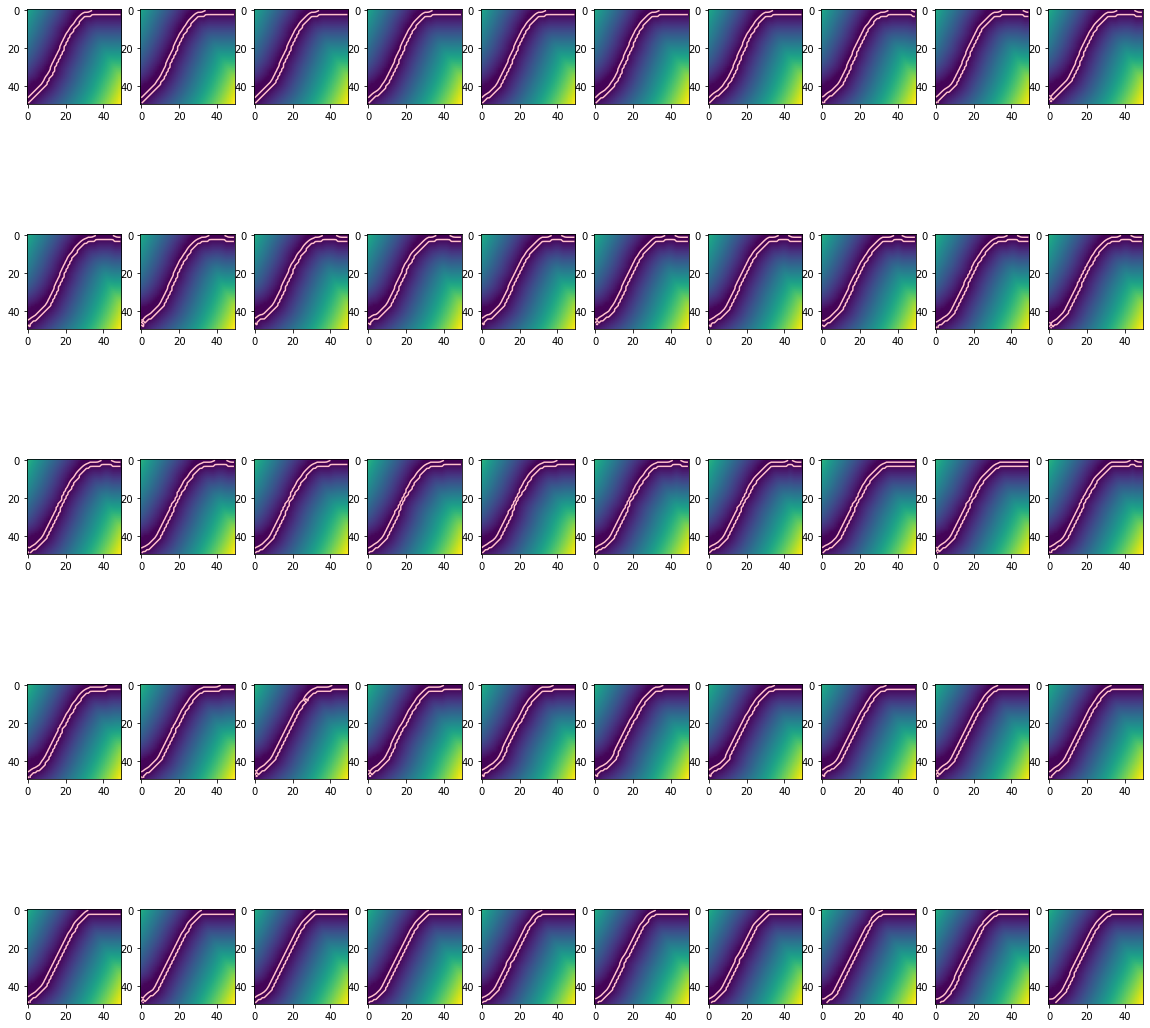

In [43]:
# Visualization of time map
fig = plt.figure()
fig, ax = plt.subplots(5,10, figsize = (20,20))
d = 0
for g in range(5):
    for h in range(10):
        timemap_step2 = time_map_arrays_step2[d]
        ax[g,h].imshow(timemap_step2)
        ax[g,h].contour(timemap_step2,levels=[2],colors=['pink'])
        d = d+1

In [29]:
# Create array of all coordinates of the timemap
timemap_coords_temp = time_map_coords_step2[0]
for fg in range(len(time_map_coords_step2)-1):
    timemap_coords_temp = np.vstack([timemap_coords_temp, time_map_coords_step2[fg+1]])

len(timemap_coords_temp)

125000

In [40]:
countb = 0
for an in range(len(inet_coords_temp)):
    if timemap_coords_temp[an,5] <= 2:
        countb = countb+1

intrusion_coords_step2 = np.zeros([countb, 4])
y = 0
for m in range(len(timemap_coords_temp)):
    if timemap_coords_temp[m,5] <= 2:
        intrusion_coords_step2[y,0] = timemap_coords_temp[m,2]
        intrusion_coords_step2[y,1] = timemap_coords_temp[m,3]
        intrusion_coords_step2[y,2] = timemap_coords_temp[m,4]
        intrusion_coords_step2[y,3] = timemap_coords_temp[m,5]
        y=y+1
countb

9875

In [41]:
final_body = np.vstack([intrusion_coords_step2, inet_coordinates])

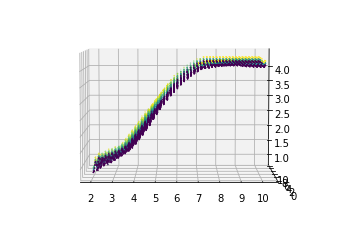

In [42]:
ax = plt.axes(projection='3d')
ax.scatter3D(final_body[:,0],final_body[:,1],final_body[:,2], s=0.1, c=final_body[:,3])
ax.view_init(5, -90)